<img style="float: left;;" src='Figures/alinco.png' /></a>

# <center> <font color= #000047> Módulo 2: Optimización con enjambre de partículas (Particle Swarm Optimization)

## Introducción

La optimización por enjambre de partículas (*Particle Swarm Optimization, PSO*) es un método de optimización heurística orientado a encontrar mínimos o máximos globales. Su funcionamiento está inspirado en el comportamiento que tienen las bandadas de pájaros o bancos de peces en los que, el movimiento de cada individuo (dirección, velocidad, aceleración...), es el resultado de combinar las decisiones individuales de cada uno con el comportamiento del resto.

> *El método de enjambre de partículas es solo una de las muchas estrategias de optimización heurística que existen, una alternativa común son los algoritmos genéticos.*

> *La optimización heurística no tiene por qué ser la forma de optimización más adecuada en todos los escenarios. Si el problema en cuestión puede optimizarse de forma analítica, suele ser más adecuado resolverlo de esta forma.*

> *La implementación de algoritmo que se muestra en este documento pretende ser lo más explicativa posible aunque para ello no sea la más eficiente.*


## Algoritmo 
<a name="Algoritmo"></a>

Aunque existen variaciones, algunas de las cuales se describen a lo largo de este documento, en términos generales, la estructura de un algoritmo *PSO* para optimizar (maximizar o minimizar) una función con una o múltiples variables sigue los siguientes pasos:

---

1. Crear un enjambre inicial de $n$ partículas aleatorias. Cada partícula consta de 4 elementos: una posición que representa una determinada combinación de valores de las variables, el valor de la función objetivo en la posición donde se encuentra la partícula, una velocidad que indica cómo y hacia donde se desplaza la partícula, y un registro de la mejor posición en la que ha estado la partícula hasta el momento.
<br><br>

2. Evaluar cada partícula con la función objetivo.
<br><br>

3. Actualizar la posición y velocidad de cada partícula. Esta es la parte que proporciona al algoritmo la capacidad de optimización. En el apartado **Mover partícula** se describe con detalle el proceso.
<br><br>

5. Si no se cumple un criterio de parada, volver al paso 2.

---


### Crear partícula
<a name="partícula"></a>

Cada partícula está definida por una posición, velocidad y valor que varían a medida que la partícula se mueve. Además, también almacena la mejor posición en la que ha estado hasta el momento. Cuando se crea aun nueva partícula, únicamente se dispone de información sobre su posición y velocidad (normalmente iniciada como cero), el resto de valores no se conocen hasta que la partícula es evaluada.

### Evaluar partícula
<a name="Evaluar partícula"></a>

Evaluar una partícula consiste en calcular el valor de la función objetivo en la posición que ocupa la partícula es ese momento. Cada partícula almacena también la posición con mejor valor en la que ha estado hasta el momento. Para poder identificar
si una nueva posición es mejor que las anteriores, es necesario conocer si se trata de un problema de minimización o maximización.

### Mover partícula
<a name="Mover partícula"></a>

Mover una partícula implica actualizar su velocidad y posición. Este paso es el más importante ya que otorga al algoritmo la capacidad de optimizar.

La velocidad de cada partícula del enjambre se actualiza empleando la siguiente ecuación:

$$v_i(t+1) = wv_i(t) + c_1r_1[\hat{x}_i(t) - x_i(t)] + c_2r_2[g(t) - x_i(t)]$$

donde:

+ $v_i(t+1)$: velocidad de la partícula $i$ en el momento $t + 1$, es decir, la nueva velocidad.
+ $v_i(t)$: velocidad de la partícula $i$ en el momento $t$, es decir, la velocidad actual.
+ $w$: coeficiente de inercia, reduce o aumenta a la velocidad de la partícula.
+ $c_1$: coeficiente cognitivo.
+ $r_1$: vector de valores aleatorios entre 0 y 1 de longitud igual a la del vector velocidad.
+ $\hat{x}_i(t)$: mejor posición en la que ha estado la partícula $i$ hasta el momento.
+ $x_i(t)$: posición de la partícula $i$ en el momento $t$.
+ $c_2$: coeficiente social.
+ $r_2$: vector de valores aleatorios entre 0 y 1 de longitud igual a la del vector velocidad.
+ $g(t)$: posición de todo el enjambre en el momento $t$, el mejor valor global.
<br>

Para comprender como se relaciona esta ecuación con el movimiento de la partícula, resulta útil diferenciar tres partes:

+ $wv_i(t)$ es la componente de inercia, responsable de mantener a la partícula moviéndose en la dirección en la que lo ha estado haciendo hasta el momento. El valor recomendado del coeficiente de inercia $w$ suele ser entre 0.8 y 1.2. Si $w<1$, la partícula se va desacelerando a medida que avanzan las iteraciones, esto se traduce en menor exploración pero una convergencia hacia el óptimo más rápida. Si $w>1$, la partícula se va acelerando, lo que permite explorar más zonas del espacio de la función pero dificulta la convergencia.
<br><br>

+ $c_1r_1[\hat{x}_i(t) - x_i(t)]$ es la componente cognitiva, responsable de que la partícula tienda a moverse hacia la posición donde ha obtenido mejores resultados hasta el momento. El coeficiente cognitivo $c_1$ suele estar acotado en el rango [0, 2], siendo 2 el valor recomendado. $r_1$ es un vector de valores aleatorios entre 0 y 1 (un valor por cada dimensión) que aporta cierto comportamiento estocástico al movimiento de las partículas, mejorando así la capacidad de escapar de mínimos locales.
<br><br>

+ $c_2r_2[g(t) - x_i(t)]$ es la componente social, responsable de que la partícula tienda a moverse hacia la mejor posición encontrada por el enjambre hasta el momento. Puede interpretarse como el "conocimiento colectivo". El valor del coeficiente social $c_2$ suele estar acotado en el rango [0, 2], siendo 2 el valor recomendado. $r_2$ es un vector de valores aleatorios entre 0 y 1 (un valor por cada dimensión) que aporta cierto comportamiento estocástico al movimiento de las partículas, mejorando así la capacidad de escapar de mínimos locales.
<br><br>

+ La magnitud relativa entre la componente cognitiva y la componente social permite regular el comportamiento exploratorio del algoritmo. Cuanto mayor es el valor de $c_1$ respecto a $c_2$, mayor independencia de movimiento tiene cada partícula, lo que permite mayor exploración pero mayor lentitud en la convergencia. Por el contrario, cuanto mayor es el valor de $c_2$ respecto a $c_1$, más obligadas están las partículas a moverse hacia la mejor región encontrada hasta el momento, lo que reduce la exploración pero acelera la convergencia.
<br><br>

+ En algunas versiones del algoritmo, $r_1$ y $r_2$ son escalares en lugar de vectores. Multiplicar cada componente de la velocidad por un valor aleatorio distinto añade mayores fluctuaciones al movimiento de las partículas, lo que, aun a riesgo de retrasar la convergencia, suele generar mejores resultados.

Una vez calculada la nueva velocidad, se puede actualizar la posición de la partícula con la ecuación:

$$x_i(t+1) = x_i(t) + v_i(t+1)$$
<br>

Uno de los principales problemas del algoritmo *PSO* es que las partículas suelen adquirir velocidades excesivamente altas, lo que les lleva a salirse de los límites del espacio de búsqueda o a que sean incapaces de converger en la región óptima. Es en este paso del algoritmo donde más investigaciones y adaptaciones se han hecho. Algunas de las soluciones son:

+ Limitar la velocidad máxima que puede alcanzar una partícula. Siendo [$x_{min}$, $x_{max}$] los límites inferior y superior del espacio de búsqueda de cada variable, la velocidad máxima que puede alcanzar la partícula en esa dirección es $v_{max} = k(x_{max} - x_{min})/2$, donde $k$ suele ser un valor entre 0.1 y 1.
<br><br>

+ Si el valor de alguna de las variables excede los límites impuestos, se sobrescribe con el valor del límite correspondiente y se reinicia su velocidad a cero. 
<br><br>

+ Reducción lineal del coeficiente de inercia $w$. Esta estrategia consiste en ir reduciendo el coeficiente de inercia a medida que avanzan las iteraciones. En las primeras iteraciones, las partículas tiene mucha capacidad de exploración y, a medida que avanza el proceso, va reduciéndose su velocidad favoreciendo la convergencia. Puede conseguirse este efecto con la ecuación:

$$w_t = (w_{max} - w_{min}) \frac{t_{max} -t}{t_{max}} + w_{min}$$

donde:

+ $w_{t}$: coeficiente de inercia en la iteración $t$.
+ $w_{max}$: coeficiente de inercia máximo. Valor con el que se inicia el algoritmo. Valor recomendado de 0.9.
+ $w_{min}$: coeficiente de inercia mínimo. Valor que se alcanza en la última iteración. Valor recomendado de 0.4.
+ $t_{max}$: número máximo de iteraciones.
<br><br>

La siguiente función actualiza la posición de una partícula teniendo en cuenta su posición y velocidad actual, la mejor posición global encontrada por el enjambre, los coeficientes de inercia, cognitivo, social, y los límites de búsqueda.

<img style="float: center;;" src='Figures/swarm.gif' width="1000" height="100"/>

In [ ]:
random.Random(0)

### Implementación

In [1]:
import random 
import math
import copy
import sys
import numpy as np
import matplotlib.pyplot as plt

In [19]:
# Clase PSO
class Particula:
    def __init__(self, fitness, dim, minx, maxx, seed):
        self.rnd = random.Random(seed)
        
        #Inicializar la posición de la particula con 0.0
        self.posicion = [0.0 for i in range (dim)]
        
        #Inicializar la velocidades de las particulas
        self.velocidad = [0.0 for i in range(dim)]
        
        #inicializamos la lista de la mejor posición de la particula, con ceros
        self.mejor_posicion = [0.0 for i in range(dim)]
        
        #Obtener de manera aleatoria velocidades y posiciones dependiendo de minx, maxx
        for i in range(dim):
            self.posicion[i] = ((maxx - minx)*self.rnd.random() + minx)
            self.velocidad[i] = ((maxx - minx)*self.rnd.random() + minx)
            
        # Evaluar las particulas en la función de costo
        self.fitness = fitness(self.posicion)
        
        #Inicializar la mejor posicion y el mejor fitness
        self.mejor_posicion_sig = copy.copy(self.posicion)
        self.mejor_fitnessVal_sig = self.fitness #mejor fitness 
        
    #Función del pso principal (donde se realiza la optimización)
    def pso(fitness, max_iter, n, dim, minx, maxx):
        # Hiperparámetros
        w = 0.729 #inercia
        c1 = 1.49445 # coeficiente cognitivo
        c2 = 1.49445 #coeficiente social
        
        rnd = random.Random(0)
        
        #Crear un enjambre de particulas de n elementos
        swarm = [Particula(fitness, dim, minx, maxx, 0) for i in range(n)]
        
        #Calcular el valor de la mejor posicion y el mejor fitness en el enjambre de particulas
        mejor_enjambre_sig = [0.0 for i in range(dim)]
        mejor_enjambre_fitnessVal = sys.float_info.max
        
        #Calcular la mejor particula con su fitness
        for i in range(n): #recorrer en cada particula
            if swarm[i].fitness < mejor_enjambre_fitnessVal:
                mejor_enjambre_fitnessVal = swarm[i].fitness
                mejor_enjambre_sig = copy.copy(swarm[i].posicion)
                
        # Loop principal del algoritmo de PSO
        
        Iter = 0
        mejor_enjambre_sig_hist = {}
        mejor_enjambre_fitnessVal_hist = {}
        
        while Iter < max_iter:
            mejor_enjambre_sig_hist[Iter] = mejor_enjambre_sig
            mejor_enjambre_fitnessVal_hist = mejor_enjambre_fitnessVal
            
            #imprimir por cada 10 iteraciones el número de iteración y el mejor fitness
            if Iter %10 ==0 and Iter>1:
                print(f"Iteración= {Iter}, mejor_fitness {mejor_enjambre_fitnessVal}")
                print(f"Mejor Posición = {mejor_enjambre_sig}")
            
            for i in range(n):
                #Calcular la velocidad de cada particula
                for k in range(dim):
                    r1 = rnd.random()
                    r2 = rnd.random()
                    
                    swarm[i].velocidad[k] = (
                                              (w*swarm[i].velocidad[k]) +
                                              (c1*r1*(swarm[i].mejor_posicion_sig[k] - swarm[i].posicion[k])) + 
                                              (c2*r2*(mejor_enjambre_sig[k] - swarm[i].posicion[k]))
                                            )
                    if swarm[i].velocidad[k] <minx:
                        swarm[i].velocidad[k] = minx
                    elif swarm[i].velocidad[k] > maxx:
                        swarm[i].velocidad[k] = maxx
                
                #calcular la nueva posición en función a la velocidad de cada particula
                for k in range(dim):
                    swarm[i].posicion[k] += swarm[i].velocidad[k]
                
                #Calcular el nuevo fitness de la nueva posicion
                swarm[i].fitness = fitness(swarm[i].posicion)
                
                #Es esta nueva posición una nueva mejor particula
                if swarm[i].fitness < swarm[i].mejor_fitnessVal_sig:
                    swarm[i].mejor_fitnessVal_sig = swarm[i].fitness
                    swarm[i].mejor_posicion_sig = copy.copy(swarm[i].posicion)
                
                #Es esta nueva posición una nueva mejor posición en todo el enjambre
                if  swarm[i].fitness < mejor_enjambre_fitnessVal:
                    mejor_enjambre_fitnessVal = swarm[i].fitness
                    mejor_enjambre_sig = copy.copy(swarm[i].posicion)
            
            #Incrementar el contador del while hasta n_iteraciones
            Iter +=1
        
        return mejor_enjambre_sig, mejor_enjambre_sig_hist, mejor_enjambre_fitnessVal_hist


### Ejemplo1

In [20]:
from matplotlib import cm

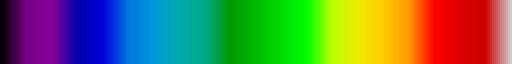

In [21]:
cm.nipy_spectral

C:\Users\uie70742\AppData\Local\Temp/ipykernel_53408/809466578.py:8: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


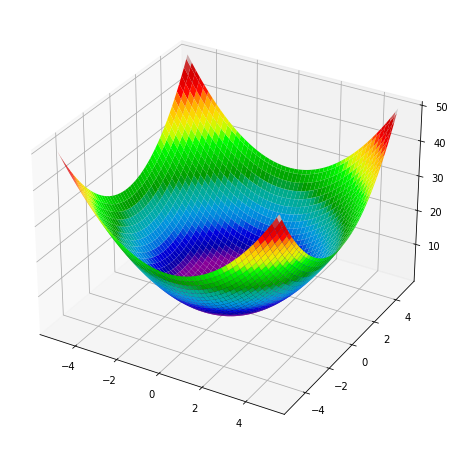

In [22]:
X = np.linspace(-5,5,100)
Y = np.linspace(-5,5,100)
X,Y = np.meshgrid(X,Y)

Z = (X**2) + (Y**2)

fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')
#ax.contour3D(X,Y,Z2,50,cmap=plt.cm.cividis)
ax.plot_surface(X,Y,Z, linewidth=0.008, cmap=cm.nipy_spectral)

In [23]:
def fitness_parabola(posicion):
    fitnesval =0.0
    for i in range(len(posicion)):
        xi = posicion[i]
        fitnesval +=xi*xi
    
    return fitnesval

In [24]:
dim = 3
fitness = fitness_parabola
num_particulas = 50
max_iter = 1000

mejor_posicion, mejor_posicion_hist, mejor_fitnessVal_hist = Particula.pso(fitness, max_iter, num_particulas, dim, -10.0, 10.0)

Iteración= 10, mejor_fitness 0.1643972472548916
Mejor Posición = [-0.3908561088428115, -0.10519354381620527, 0.023729049170499783]
Iteración= 20, mejor_fitness 0.005340600913590849
Mejor Posición = [-0.007006712014250349, -0.07174813809412961, -0.01198797649171518]
Iteración= 30, mejor_fitness 0.0018644784273370225
Mejor Posición = [-0.021415687664613478, -0.0335926277572071, 0.016654792390013856]
Iteración= 40, mejor_fitness 0.00018531355997489284
Mejor Posición = [-0.01204846241495479, 0.004667280443037339, -0.004285394576507021]
Iteración= 50, mejor_fitness 6.148997697278133e-06
Mejor Posición = [0.0020580866662052583, -0.0013688509998871883, -0.00019880621663847403]
Iteración= 60, mejor_fitness 2.064968767354542e-07
Mejor Posición = [0.0004222557345443656, 2.1104817536765044e-05, -0.00016658798893255265]
Iteración= 70, mejor_fitness 5.867492823517288e-08
Mejor Posición = [-4.5734485705714546e-05, -0.00020473413386909602, -0.00012110829650060204]
Iteración= 80, mejor_fitness 2.00799

Iteración= 830, mejor_fitness 4.939730520527684e-69
Mejor Posición = [-4.903063620540123e-35, -2.8399570048832333e-35, -4.1583550291704857e-35]
Iteración= 840, mejor_fitness 6.18315574634658e-70
Mejor Posición = [-1.484362611996497e-35, 1.269860747690867e-35, -1.538595809147909e-35]
Iteración= 850, mejor_fitness 2.6052871980735694e-71
Mejor Posición = [1.719082928077952e-36, 4.134762837422756e-36, -2.4497677737684337e-36]
Iteración= 860, mejor_fitness 2.6052871980735694e-71
Mejor Posición = [1.719082928077952e-36, 4.134762837422756e-36, -2.4497677737684337e-36]
Iteración= 870, mejor_fitness 6.678340763959381e-72
Mejor Posición = [5.4822785847328496e-37, 2.2497795087273e-36, 1.1472920906482038e-36]
Iteración= 880, mejor_fitness 1.42814625883008e-72
Mejor Posición = [5.2061493420964496e-37, 5.500067998786334e-37, 9.244451683010908e-37]
Iteración= 890, mejor_fitness 1.404683376555211e-73
Mejor Posición = [-2.2153377114293883e-37, 2.8062549664846576e-37, 1.1242978488599466e-37]
Iteración= 

In [25]:
mejor_posicion

[-1.7585837574926188e-41, -1.24005420237412e-41, -1.918398499144207e-41]

In [26]:
mejor_fitnessVal_hist

1.8832533220746516e-81

### Ejemplo 2

In [27]:
X = np.linspace(-5,5,100)
Y = np.linspace(-5,5,100)

X,Y = np.meshgrid(X,Y)

Z = (X**2 - 10*np.cos(2*np.pi*X)) + (Y**2 - 10*np.cos(2*np.pi*Y)) + 20

C:\Users\uie70742\AppData\Local\Temp/ipykernel_53408/1409043219.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


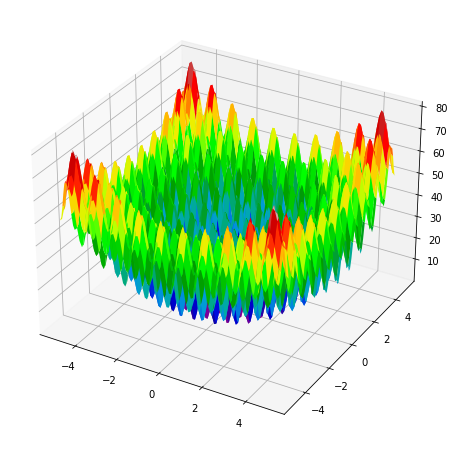

In [28]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')
#ax.contour3D(X,Y,Z2,50,cmap=plt.cm.cividis)
ax.plot_surface(X,Y,Z, linewidth=0.008, cmap=cm.nipy_spectral)

In [31]:
def fitness_fun2(pos): #pos[0]--->x, pos[1]--->y
    fitnesval =0.0
    
    #(X**2 - 10*np.cos(2*np.pi*X)) + (Y**2 - 10*np.cos(2*np.pi*Y)) + 20
    #for i in range(len(posicion)):
    #    xi = posicion[i]
    #    fitnesval +=xi*xi
    
    fitnesval = (pos[0]**2 - 10*np.cos(2*np.pi*pos[0])) + (pos[1]**2 - 10*np.cos(2*np.pi*pos[1])) + 20
    
    return fitnesval

### Ejercicio

In [32]:
dim = 2
fitness = fitness_fun2
num_particulas = 50
max_iter = 1000

mejor_posicion, mejor_posicion_hist, mejor_fitnessVal_hist = Particula.pso(fitness, max_iter, num_particulas, dim, -10.0, 10.0)

Iteración= 10, mejor_fitness 1.4236946455913575
Mejor Posición = [0.9485210653014207, -0.005237766839625735]
Iteración= 20, mejor_fitness 0.2531591873666166
Mejor Posición = [-0.030906552625787648, -0.018004627043378907]
Iteración= 30, mejor_fitness 0.010247081046145468
Mejor Posición = [0.002112144680903108, -0.006869996701437703]
Iteración= 40, mejor_fitness 0.0007415762779103829
Mejor Posición = [0.0019315565309751398, -8.406934198990079e-05]
Iteración= 50, mejor_fitness 0.0005543502703346803
Mejor Posición = [0.0016624309556741088, -0.0001748254475177134]
Iteración= 60, mejor_fitness 6.504064196022341e-05
Mejor Posición = [0.0005268226680842838, 0.00022426998685802545]
Iteración= 70, mejor_fitness 5.2444210673741054e-05
Mejor Posición = [0.0005070847374012354, -8.492094457304564e-05]
Iteración= 80, mejor_fitness 2.368516618389549e-07
Mejor Posición = [1.0183749947696534e-05, -3.301738369914264e-05]
Iteración= 90, mejor_fitness 2.368516618389549e-07
Mejor Posición = [1.0183749947696

Renombrar la librría "evolutivos" añadir la clase PSO, importar la librería y optimizar la funcost3